In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')#plt.style.use('fivethirtyeight')#plt.style.use('bmh')
#https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
import missingno as msno
import seaborn as sns
import datetime
import math as m
import cufflinks as cf
from scipy.spatial import distance 
from PIL.Image import open as open_wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
cf.go_offline()
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',200)

In [2]:
df=pd.read_csv("US_Accidents_June20.csv")#.sample(n=100000, random_state=1)

In [ ]:
#df.info()

In [ ]:
#df.columns

In [3]:
df['Start_Time']=pd.to_datetime(df['Start_Time'])
df['End_Time']=pd.to_datetime(df['End_Time'])

In [ ]:
msno.matrix(df)

In [ ]:
msno.heatmap(df)

In [4]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 3513617
Columns  : 49

Features :
     : ['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

Missing values    : 13061803

Unique values :  
 ID                       3513617
Source                         3
TMC                           21
Severity                       4
Start_Time               3200042
End_Time                 3246120
Start_Lat                

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Source'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Sources')
ax[0].set_ylabel('Count')
sns.countplot('Source',data=df,ax=ax[1],order=df['Source'].value_counts().index)
ax[1].set_title('Count of Source')
plt.show()

In [ ]:
df['Source'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
sns.countplot('Severity',data=df,order=df['Severity'].value_counts().index)
plt.show()

In [ ]:
#fig = msno.matrix(df)
#fig_copy = fig.get_figure()
#fig_copy.savefig('plotmatriz.png')

In [ ]:
fig = msno.heatmap(df)
fig_copy = fig.get_figure()
fig_copy.savefig('plot.png')

In [ ]:
#df.isnull().sum()

In [ ]:
df['City'].unique()## 'County'

In [ ]:
#df['Weather_Condition'].unique()## 

In [ ]:
#msno.bar(df)

In [ ]:
#df['Wind_Direction'].unique()## 

In [ ]:
df["Description"].head(30)

In [ ]:
df["Civil_Twilight"].unique()

In [ ]:
df["Sunrise_Sunset"].unique()

In [ ]:
df["Nautical_Twilight"].unique()

In [ ]:
###'Amenity', 'Bump', 'Crossing',
##       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
##       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'

In [ ]:
df["Turning_Loop"].value_counts(normalize=True)

In [ ]:
##df2=df.head(5)
##df2.to_csv("Test.csv")

#### Visualización de Continuas

In [ ]:
cont=['Distance(mi)','Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)','Wind_Speed(mph)',
       'Precipitation(in)']

In [ ]:
sns.pairplot(df[cont])

In [ ]:
plt.style.use('default')

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature(F)',y='Wind_Chill(F)',data=df.sample(frac=.1, random_state=1),
                color='maroon')
sns.despine()

In [ ]:
plt.style.use('default')#fivethirtyeight

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df[cont].sample(frac=.1, random_state=1).corr())
sns.despine()

In [ ]:
plt.style.use('fivethirtyeight')#fivethirtyeight

In [ ]:
sns.boxplot(x="Severity",y="Temperature(F)",data=df,showfliers=False)#Distance(mi)#.sample(frac=.1, random_state=1)

In [ ]:
sns.boxplot(x="Severity",y="Wind_Chill(F)",data=df,showfliers=False)#Distance(mi)#.sample(frac=.1, random_state=1)

In [ ]:
sns.boxplot(x="Severity",y="Distance(mi)",data=df,showfliers=False)#.sample(frac=.1, random_state=1)
sns.despine()

In [ ]:
disc=["State","Timezone","Weather_Condition"]

In [11]:
### hacer los barplots
Estados=df["State"].value_counts().head(10)
Clima=df["Weather_Condition"].value_counts().head(10)
Zona=df["Timezone"].value_counts().head(10)

In [17]:
Estados.iplot(kind='bar',color=['red'],theme='white')

In [18]:
Clima.iplot(kind='bar',color=['blue'],theme='white')

In [23]:
Zona.iplot(kind='bar',color=['brown'],theme='white')

## ing variables

In [ ]:
df.shape

In [ ]:
df["Start_Time"].head()

In [ ]:
df["End_Time"].head()

In [4]:
df["time"]=df["End_Time"]-df["Start_Time"]

In [5]:
df["TimeMinutes"]= pd.to_timedelta(df["time"]).astype('timedelta64[m]').astype(int)
df["TimeMinutes2"]=round(df["time"]/np.timedelta64(1,'m'))

In [26]:
df[["TimeMinutes","TimeMinutes2"]]

,TimeMinutes1,TimeMinutes2
0,314,314.0
1,30,30.0
2,30,30.0
3,30,30.0
4,30,30.0
...,...,...
3513612,28,29.0
3513613,26,27.0
3513614,28,28.0
3513615,29,29.0


In [6]:
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day

In [ ]:
df.info()

In [ ]:
df["distancia_euclidiana"]=(df["Start_Lat"]-df["End_Lat"])**2+(df["Start_Lng"]-df["End_Lng"])**2

In [ ]:
df["distancia_euclidiana"]=df["distancia_euclidiana"].apply(m.sqrt)

In [ ]:
df[df["distancia_euclidiana"].notnull()]

In [ ]:
df["Velocidad de afectación"]=(df["Distance(mi)"]*60)/df['time1']

In [ ]:
df["norma_1"]=abs(df["Start_Lat"]-df["End_Lat"])+abs(df["Start_Lng"]-df["End_Lng"])

In [ ]:
df.head()

In [ ]:
sns.boxplot(data=df,x="Severity",y="TimeMinutes1",showfliers = False)

In [6]:
df1=df[df["TimeMinutes"]>0].copy()

In [ ]:
df.shape

In [ ]:
df1.shape

In [ ]:
sns.boxplot(data=df1,x="Severity",y="time",showfliers = False)

In [ ]:
df1.groupby("Severity").agg({"time":[min,max,"mean"]})

In [ ]:
df["Date"]=df["Start_Time"].dt.date

In [ ]:
tabla=df.groupby("Date").agg({"Date":["count"]})

In [ ]:
tabla

In [ ]:
freq="1MS"
df_mes=df[['Start_Time',"ID"]].groupby(pd.Grouper(key='Start_Time', freq=freq)).count()

In [ ]:
df_mes.iplot()

In [ ]:
plt.figure(figsize=(14,8))
sub_6=df[df.Severity<5]
viz_4=sub_6.plot(kind='scatter', x='Start_Lng',y='Start_Lat',label='Severity',c='Severity',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,8))
viz_4.legend()
plt.ioff()
## alpha la transparencia
##plt.ioff() apaga la parte interactiva

In [ ]:
sns.jointplot(x=df.Start_Lat.values,y=df.Start_Lng.values,height=10)
plt.ylabel('Start_Lat', fontsize=12)
plt.xlabel('Start_Lng', fontsize=12)
plt.show()

In [7]:
County=df[["County","ID"]].groupby("County").count()
County.rename(columns={"ID":"County_Freq"},inplace=True)
Zipcode=df[["Zipcode","ID"]].groupby("Zipcode").count()
Zipcode.rename(columns={"ID":"Zipcode_Freq"},inplace=True)
State=df[["State","ID"]].groupby("State").count()
State.rename(columns={"ID":"State_Freq"},inplace=True)
City=df[["City","ID"]].groupby("City").count()
City.rename(columns={"ID":"City_Freq"},inplace=True)
Airport=df[["Airport_Code","ID"]].groupby("Airport_Code").count()
Airport.rename(columns={"ID":"Airport_Freq"},inplace=True)

In [8]:
df1=pd.merge(df,County,how="left", left_on="County", right_on="County")
df1=pd.merge(df1,State,how="left", left_on="State", right_on="State")
df1=pd.merge(df1,City,how="left", left_on="City", right_on="City")
df1=pd.merge(df1,Airport,how="left", left_on="Airport_Code", right_on="Airport_Code")

In [9]:
df1.shape

(3513617, 61)

In [10]:
df.shape

(3513617, 57)

In [76]:
df1.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,time,TimeMinutes1,TimeMinutes2,Hour,Weekday,Year,Month,Day,County_Freq,State_Freq,City_Freq,Airport_Freq
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,0 days 05:14:00,314,314.0,5,Mon,2016,Feb,8,66940,66139,14251.0,5506.0
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,0 days 00:30:00,30,30.0,6,Mon,2016,Feb,8,16330,66139,257.0,7684.0
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,0 days 00:30:00,30,30.0,6,Mon,2016,Feb,8,507,66139,830.0,719.0
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,0 days 00:30:00,30,30.0,7,Mon,2016,Feb,8,66940,66139,14251.0,6530.0
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,0 days 00:30:00,30,30.0,7,Mon,2016,Feb,8,66940,66139,14251.0,4835.0


# Generar plots de texto

In [ ]:
#https://fontawesome.com/icons/jedi-order?style=brands

In [ ]:
texto=df["Description"].dropna()

In [ ]:
import re, unicodedata
##quita acentos,vuelve todo a minúsculas y se quitan signos 
def clean_words(text):
    res =  unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    res = re.sub("[^a-zA-Z0-9 ]"," ", res.decode("utf-8"), flags=re.UNICODE)
    res =  u' '.join(res.lower().split())
    return res

In [ ]:
texto1=texto.map(clean_words)

In [ ]:
texto

In [ ]:
texto1

#### Stop Words

In [ ]:
stopwords=stopwords.words('english')

In [ ]:
texto_limpio=' '.join(texto1.to_list())

In [ ]:
vocab=[x for x in texto_limpio.split() if x not in stopwords]

### Hapaxes

In [ ]:
freq=nltk.FreqDist(vocab)

In [ ]:
texto_limpio2=' '.join(vocab)

In [ ]:
#texto_limpio2=' '.join([word for word in vocab if word not in freq.hapaxes()])

In [ ]:
import stylecloud

In [ ]:
#<i class="fas fa-car-crash"></i>

In [ ]:
stylecloud.gen_stylecloud(text=texto_limpio2,
                          icon_name='fas fa-car-crash',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal',
                         output_name='crash.png')

In [ ]:
open_wordcloud('crash.png')

# Nota POI Point of interes

#### Tratamiento de valores Atípicos

In [79]:
df1.describe(np.arange(.1,1,.1))

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),time,TimeMinutes1,TimeMinutes2,Hour,Year,Day,County_Freq,State_Freq,City_Freq,Airport_Freq
count,2.478818e+06,3.513617e+06,3.513617e+06,3.513617e+06,1.034799e+06,1.034799e+06,3.513617e+06,1.250753e+06,3.447885e+06,1.645368e+06,3.443930e+06,3.457735e+06,3.437761e+06,3.059008e+06,1.487743e+06,3513617,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06,3.513617e+06,3.513505e+06,3.506859e+06
mean,2.080226e+02,2.339929e+00,3.654195e+01,-9.579151e+01,3.755758e+01,-1.004560e+02,2.816167e-01,5.975383e+03,6.193512e+01,5.355730e+01,6.511427e+01,2.974463e+01,9.122644e+00,8.219025e+00,1.598256e-02,0 days 01:55:19.101387259,1.148487e+02,1.154041e+02,1.216058e+01,2.018140e+03,1.569788e+01,4.856241e+04,2.950308e+05,1.649511e+04,1.513805e+04
std,2.076627e+01,5.521935e-01,4.883520e+00,1.736877e+01,4.861215e+00,1.852879e+01,1.550134e+00,1.496624e+04,1.862106e+01,2.377334e+01,2.275558e+01,8.319758e-01,2.885879e+00,5.262847e+00,1.928262e-01,2 days 08:20:23.676063284,3.380400e+03,3.380393e+03,5.121891e+00,1.239829e+00,8.700429e+00,7.013437e+04,2.993384e+05,2.524649e+04,1.518735e+04
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1 days +23:25:55,-3.500000e+01,-3.400000e+01,0.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,4.400000e+01,1.000000e+00,1.000000e+00
10%,2.010000e+02,2.000000e+00,2.992991e+01,-1.215453e+02,3.249008e+01,-1.221438e+02,0.000000e+00,2.010000e+02,3.600000e+01,2.190000e+01,3.300000e+01,2.913000e+01,5.000000e+00,3.000000e+00,0.000000e+00,0 days 00:29:25,2.900000e+01,2.900000e+01,6.000000e+00,2.016000e+03,4.000000e+00,2.242000e+03,4.973100e+04,2.490000e+02,1.426000e+03
20%,2.010000e+02,2.000000e+00,3.287892e+01,-1.181277e+02,3.383938e+01,-1.200786e+02,0.000000e+00,6.000000e+02,4.600000e+01,3.160000e+01,4.400000e+01,2.960000e+01,1.000000e+01,4.600000e+00,0.000000e+00,0 days 00:29:40,2.900000e+01,3.000000e+01,7.000000e+00,2.017000e+03,7.000000e+00,5.539000e+03,6.613900e+04,6.490000e+02,3.284000e+03
30%,2.010000e+02,2.000000e+00,3.391207e+01,-1.119389e+02,3.408717e+01,-1.180977e+02,0.000000e+00,1.114000e+03,5.310000e+01,3.900000e+01,5.300000e+01,2.981000e+01,1.000000e+01,5.800000e+00,0.000000e+00,0 days 00:29:47,2.900000e+01,3.000000e+01,8.000000e+00,2.017000e+03,1.000000e+01,1.031900e+04,9.012200e+04,1.275000e+03,5.370000e+03
40%,2.010000e+02,2.000000e+00,3.434280e+01,-9.676403e+01,3.577961e+01,-1.171126e+02,0.000000e+00,1.818000e+03,5.900000e+01,4.900000e+01,6.000000e+01,2.989000e+01,1.000000e+01,6.000000e+00,0.000000e+00,0 days 00:31:31,3.100000e+01,3.200000e+01,1.000000e+01,2.018000e+03,1.300000e+01,1.635600e+04,9.969200e+04,2.126000e+03,7.925000e+03
50%,2.010000e+02,2.000000e+00,3.591687e+01,-9.102601e+01,3.779736e+01,-9.703438e+01,0.000000e+00,2.798000e+03,6.400000e+01,5.700000e+01,6.700000e+01,2.995000e+01,1.000000e+01,7.000000e+00,0.000000e+00,0 days 00:44:40,4.400000e+01,4.500000e+01,1.200000e+01,2.018000e+03,1.600000e+01,2.289100e+04,1.608170e+05,4.077000e+03,9.953000e+03
60%,2.010000e+02,2.000000e+00,3.799125e+01,-8.456184e+01,3.904647e+01,-8.986710e+01,0.000000e+00,4.034000e+03,6.900000e+01,6.300000e+01,7.400000e+01,3.001000e+01,1.000000e+01,9.000000e+00,0.000000e+00,0 days 00:52:21,5.200000e+01,5.200000e+01,1.400000e+01,2.019000e+03,1.900000e+01,3.432900e+04,1.732770e+05,8.107000e+03,1.307000e+04


In [11]:
outliers=["Distance(mi)","Visibility(mi)","Wind_Speed(mph)","TimeMinutes1"]

In [99]:
df[outliers].describe()

,Distance(mi),Visibility(mi),Wind_Speed(mph),TimeMinutes1
count,3.513617e+06,3.437761e+06,3.059008e+06,3.513617e+06
mean,2.816167e-01,9.122644e+00,8.219025e+00,1.148487e+02
std,1.550134e+00,2.885879e+00,5.262847e+00,3.380400e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,-3.500000e+01
25%,0.000000e+00,1.000000e+01,5.000000e+00,2.900000e+01
50%,0.000000e+00,1.000000e+01,7.000000e+00,4.400000e+01
75%,1.000000e-02,1.000000e+01,1.150000e+01,7.400000e+01
max,3.336300e+02,1.400000e+02,9.840000e+02,1.421955e+06


In [12]:
df1.shape

(3513617, 61)

In [7]:
df1=df1[(df1["TimeMinutes"]>=0)].copy()

In [14]:
df1.shape

(3513595, 61)

In [15]:
3513595/3513617

0.9999937386459594

In [8]:
q1=df1["Wind_Speed(mph)"].quantile(.25)
q3=df1["Wind_Speed(mph)"].quantile(.75)

In [9]:
IQR=1.5*(q3-q1)

In [10]:
df2=df1[(df1["Wind_Speed(mph)"]>=q1-IQR)&(df1["Wind_Speed(mph)"]<=q3+IQR)].copy()

In [11]:
df2.shape

(3010711, 52)

In [24]:
3010711/3513617

0.8568694311303707

In [39]:
df2[outliers].describe(np.arange(.1,1,.1))

,Distance(mi),Visibility(mi),Wind_Speed(mph),TimeMinutes1
count,2.983108e+06,2.920623e+06,2.604423e+06,2.983108e+06
mean,2.115223e-01,9.110080e+00,8.145676e+00,4.586742e+01
std,1.443497e+00,2.859688e+00,5.232910e+00,2.344778e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
10%,0.000000e+00,5.000000e+00,3.000000e+00,2.900000e+01
20%,0.000000e+00,9.000000e+00,4.600000e+00,2.900000e+01
30%,0.000000e+00,1.000000e+01,5.800000e+00,2.900000e+01
40%,0.000000e+00,1.000000e+01,6.000000e+00,2.900000e+01
50%,0.000000e+00,1.000000e+01,7.000000e+00,3.700000e+01
60%,0.000000e+00,1.000000e+01,8.100000e+00,4.400000e+01


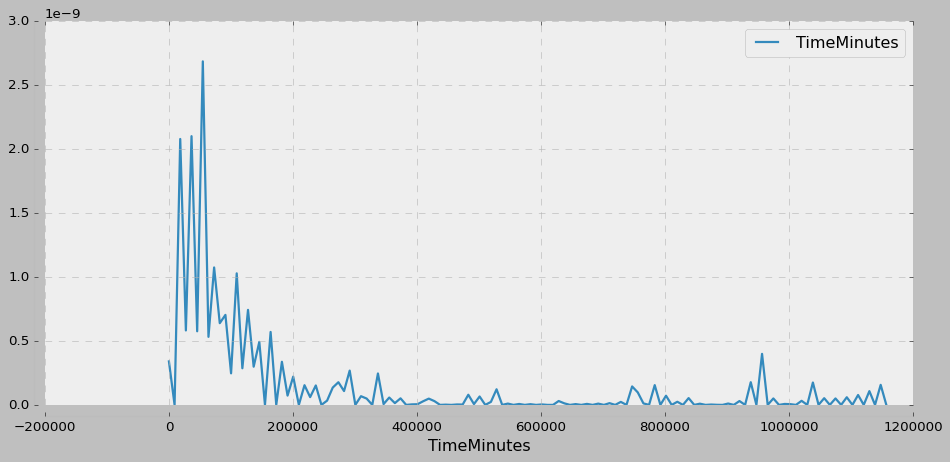

In [12]:
plt.style.use('bmh')#plt.style.use('classic')#plt.style.use('default')#
plt.figure(figsize=(14,6))
sns.distplot(df2["TimeMinutes"],label="TimeMinutes",hist=False)
sns.despine(offset=10, trim=True)